In [1]:
%cd ..

import matplotlib.pyplot as plt

/Users/edwardgunn/Documents/4YP/DistributedReinforcementLearningOnTheEdge


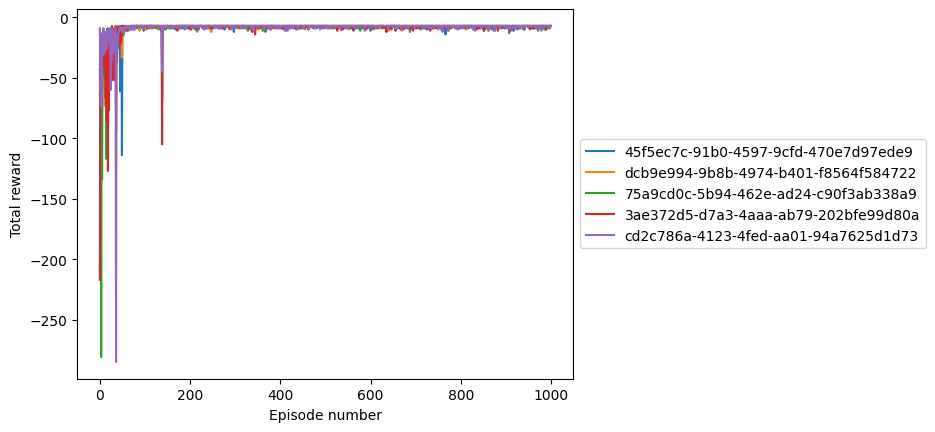

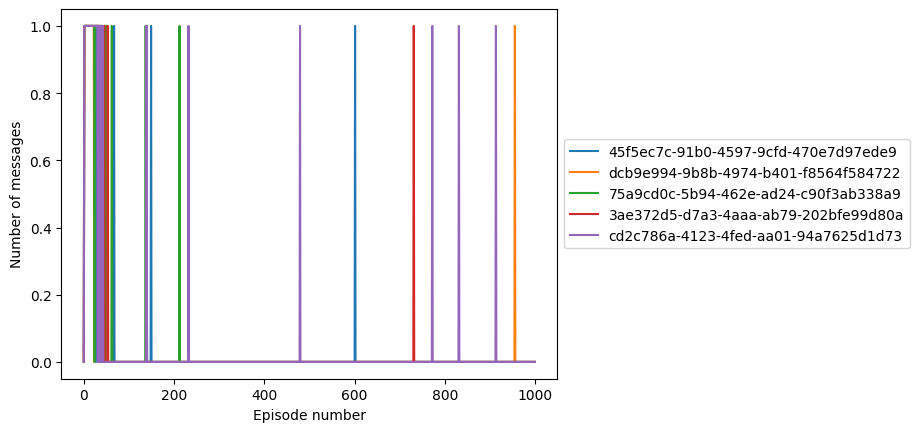

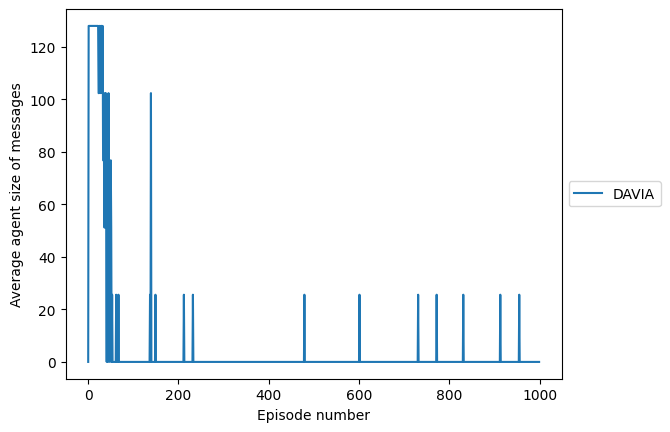

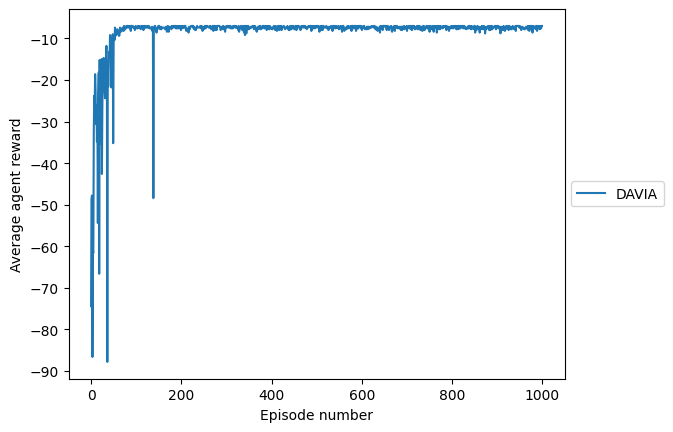

KeyError: '?valueFunction'

In [8]:
from DataAnalysis.Analysis import plotAgentEpisodeReward, plotAgentEpisodeNumMessages, plotAlgorithmEpisodeAverageSizeMessages, getAgentEpisodeAverageNumberOfMessagesPerStep, getFinalValueFunction, getAgentEpisodeReward, printV2D, plotAlgorithmEpisodeAverageReward
import pickle
f = open('ExperimentFramework/Experiments/Results/DAVIA.pkl', 'rb')
data = pickle.load(f)
algorithm = "DAVIA"
numAgents = 5
environment = "SimpleGrid"
plotAgentEpisodeReward(data, algorithm, numAgents, environment)
plotAgentEpisodeNumMessages(data, algorithm, numAgents, environment)
plotAlgorithmEpisodeAverageSizeMessages(data, [algorithm], numAgents, environment)
plotAlgorithmEpisodeAverageReward(data, [algorithm], numAgents, environment)
plt.show()
# printV2D(getFinalValueFunction(data, algorithm, numAgents, environment))
print(getFinalValueFunction(data, algorithm, numAgents, environment))
f.close()

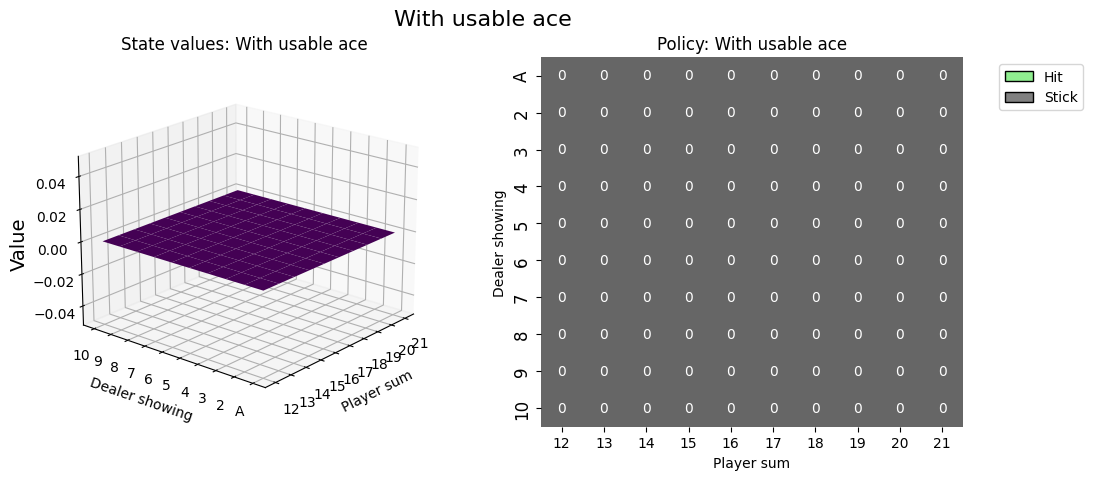

In [ ]:
from DataAnalysis.Analysis import create_grids, create_plots
import matplotlib.pyplot as plt
q = getFinalValueFunction(data, algorithm, numAgents, environment)
value_grid, policy_grid = create_grids(q, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

# Distributed Reinforcement Learning Algorithm Comparison

In [ ]:
#setup variables

## Environment comparisons

In [3]:
#environment setup variables
filepath = 'ExperimentFramework/Experiments/Results/'
numbersOfAgents = [1,3,5]
algorithms = ["DQL", "EBCDQL", "DAVIA", "EvolutionStrategies", "LAPG"]
environments = ["SimpleGrid", "FrozenLake-v1", "CliffWalking-v0", "CartPole-v1"]

environments = ["SimpleGrid"]
envFiles = [[f"SimpleGrid_c{i}" for i in range(10)]]

algorithms = ["EDQL", "EEBCDQL", "DAVIA", "EvolutionStrategies"]#["DQL", "EBCDQL", "DAVIA", "EvolutionStrategies"]


## SimpleGrid

### Number of Agents: 1

Quality of learning

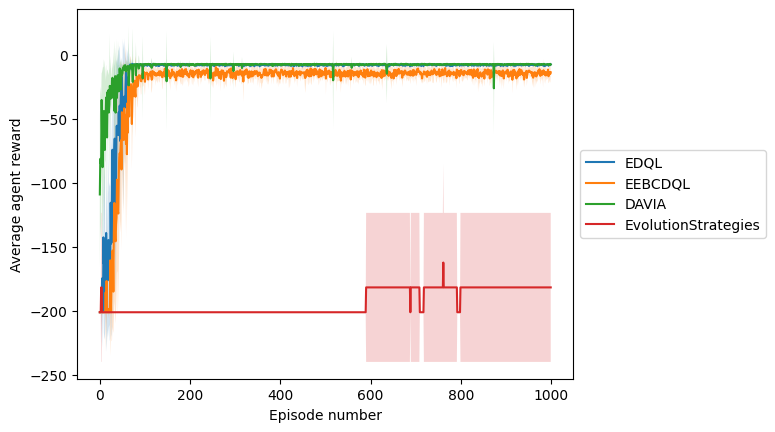

Amount of communication

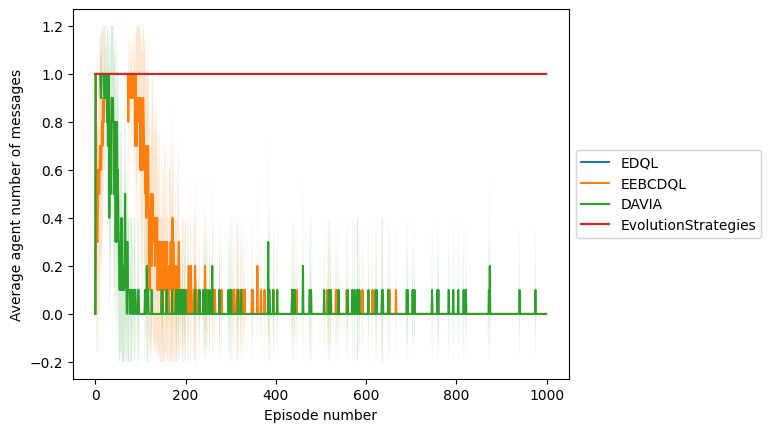

Amount of communication

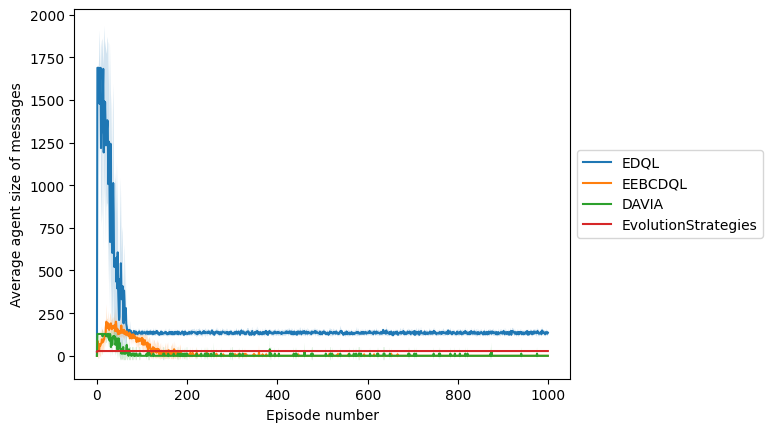

### Number of Agents: 3

Quality of learning

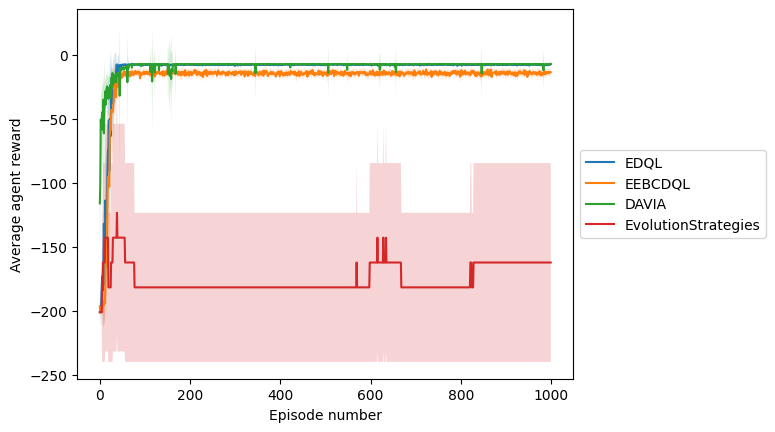

Amount of communication

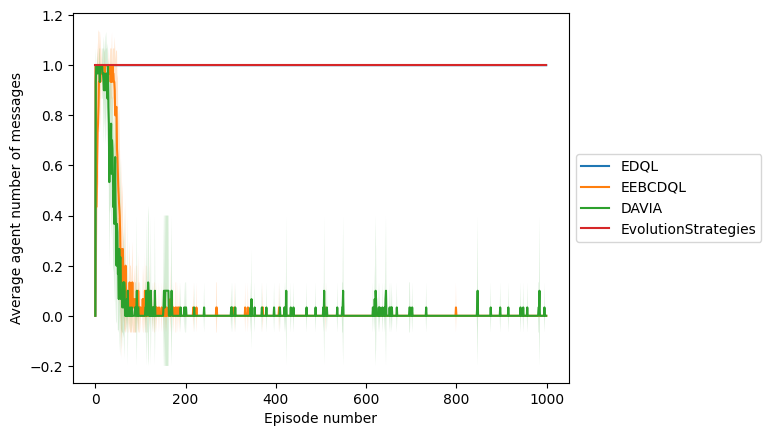

Amount of communication

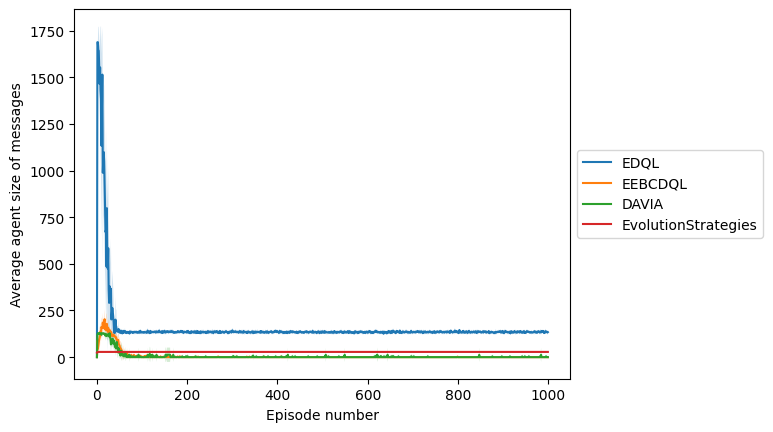

### Number of Agents: 5

Quality of learning

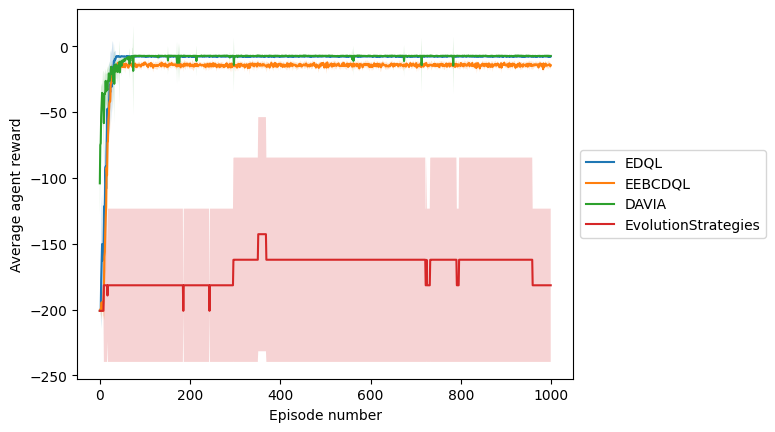

Amount of communication

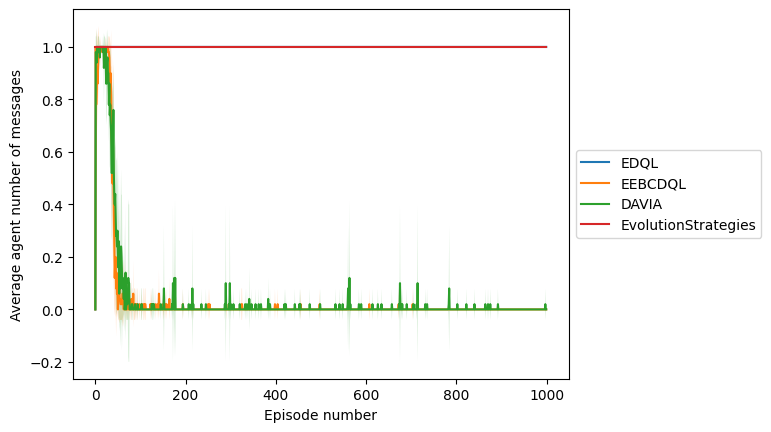

Amount of communication

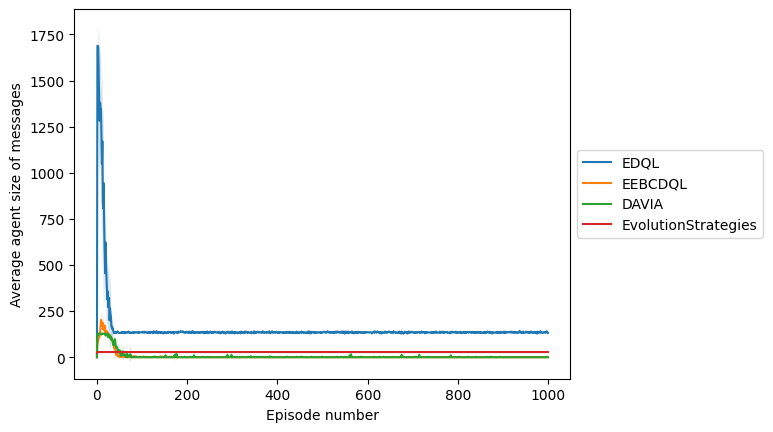

In [4]:
#code to make graphs of all agents on simple grid
#on the left a graph of the cumulative reward of each algorithm averaged across their agents
#on the right a graph of the number of messages sent by each algorithm averaged across their agents
from DataAnalysis.Analysis import getAlgorithmEpisodeAverageReward, getAgentEpisodeAverageNumMessages,getAgentEpisodeAverageSizeMessages, plotAlgorithmAverageTrialReward, plotAlgorithmAverageTrialMessages
import pickle
from IPython.display import display, Markdown
from collections import defaultdict
import numpy as np
for environment, fileNames in zip(environments, envFiles):
    display(Markdown(f"## {environment}"))
    for numAgents in numbersOfAgents:
        algorithmData = defaultdict(lambda: {"reward":[], "messages":[], "message_size": []})
        for fileName in fileNames:
            with open(f"{filepath}{fileName}.pkl", 'rb') as f:
                data = pickle.load(f)
                for algorithm in algorithms:
                    algorithmData[algorithm]["reward"].append(getAlgorithmEpisodeAverageReward(data, algorithm, numAgents, environment))
                    algorithmData[algorithm]["messages"].append(getAgentEpisodeAverageNumMessages(data, algorithm, numAgents, environment))
                    algorithmData[algorithm]["message_size"].append(getAgentEpisodeAverageSizeMessages(data, algorithm, numAgents, environment))

        rewards = {algorithm: (np.mean(algorithmData[algorithm]["reward"], axis=0), np.std(algorithmData[algorithm]["reward"], axis=0)) for algorithm in algorithms}
        messages = {algorithm: (np.mean(algorithmData[algorithm]["messages"], axis=0), np.std(algorithmData[algorithm]["messages"], axis=0)) for algorithm in algorithms}
        message_size = {algorithm: (np.mean(algorithmData[algorithm]["message_size"], axis=0), np.std(algorithmData[algorithm]["message_size"], axis=0)) for algorithm in algorithms}
        display(Markdown(f"### Number of Agents: {numAgents}"))
        display(Markdown(f"Quality of learning"))
        fig = plt.figure()
        for algorithm, (y, error) in rewards.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm)  
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent reward')
        # plt.ylim([-1000, 10])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        display(Markdown(f"Amount of communication"))
        fig = plt.figure()
        for algorithm, (y, error) in messages.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm) 
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent number of messages')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        display(Markdown(f"Amount of communication"))
        fig = plt.figure()
        for algorithm, (y, error) in message_size.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm) 
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent size of messages')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()


In [5]:
#environment setup variables
filepath = 'ExperimentFramework/Experiments/Results/'
numbersOfAgents = [1,3,5]

environments = ["SimpleGrid"]
envFiles = [[f"SimpleGrid_b{i}" for i in range(5)]]

algorithms = ["EDQL", "EEBCDQL", "DAVIA", "EvolutionStrategies"]#["DQL", "EBCDQL", "DAVIA", "EvolutionStrategies"]


## SimpleGrid

### Number of Agents: 1

Quality of learning

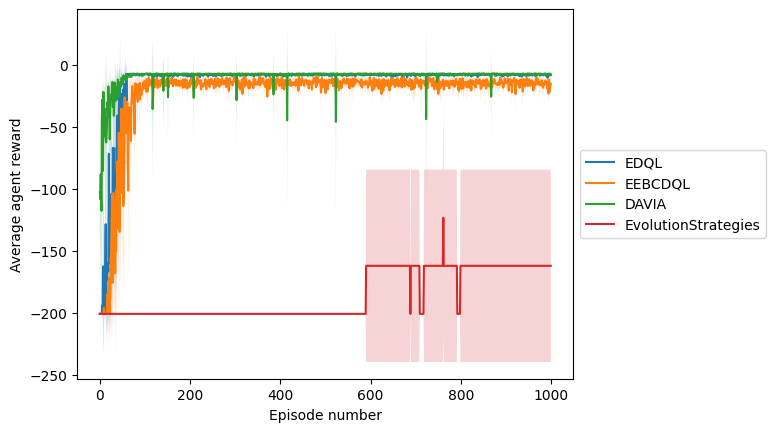

Amount of communication

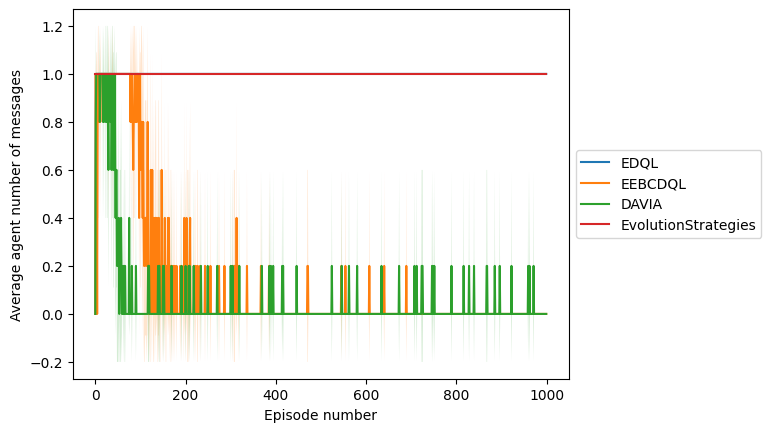

Amount of communication

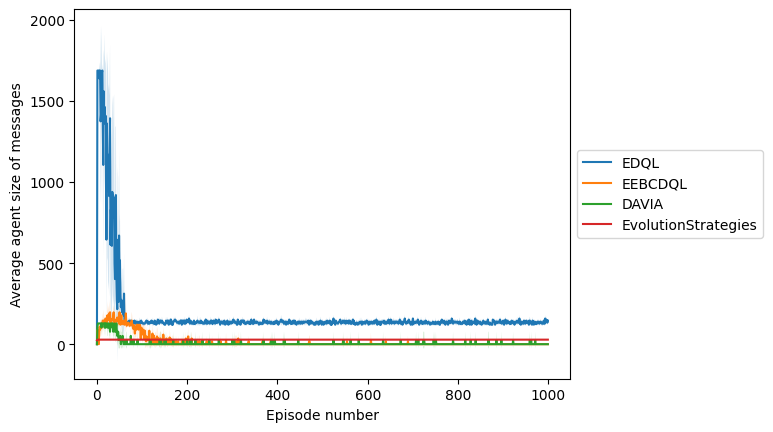

### Number of Agents: 3

Quality of learning

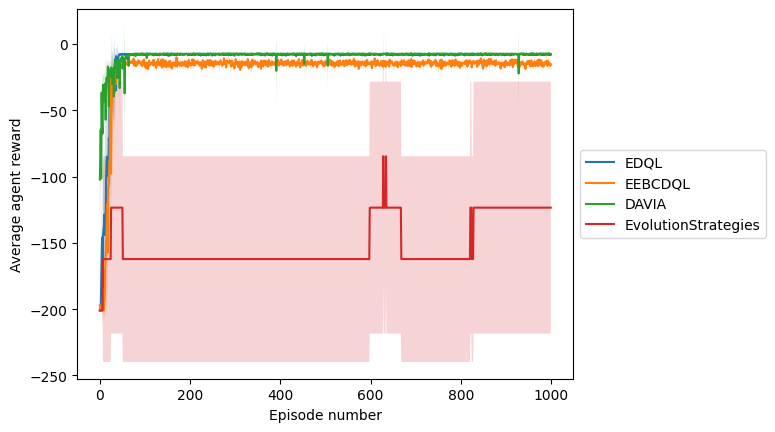

Amount of communication

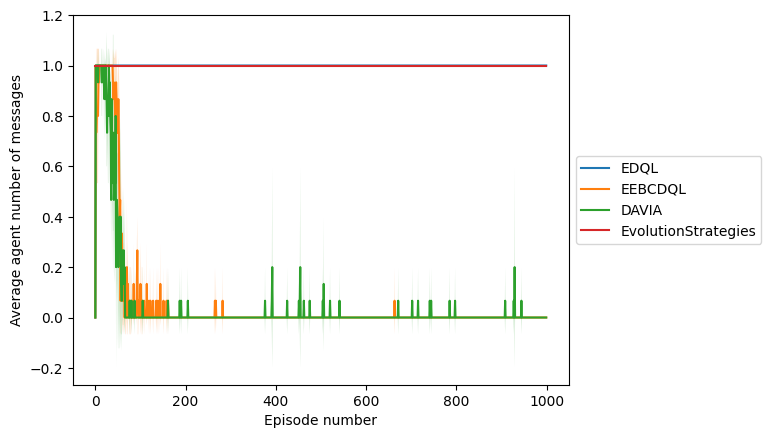

Amount of communication

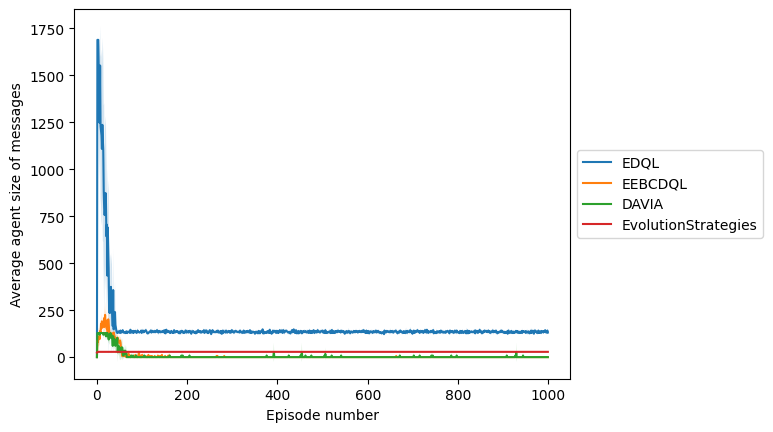

### Number of Agents: 5

Quality of learning

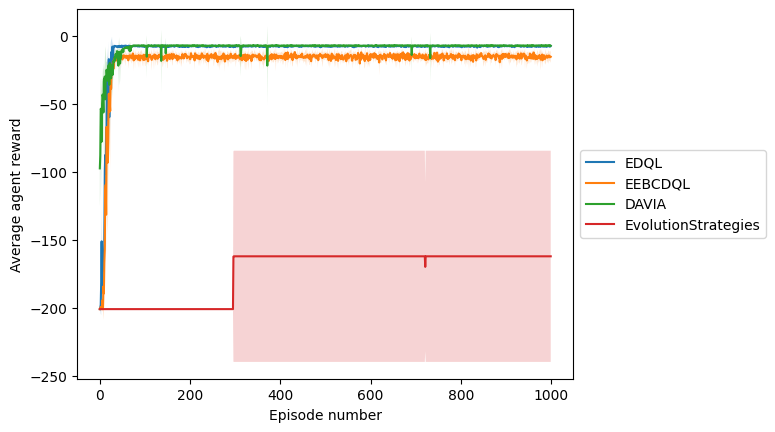

Amount of communication

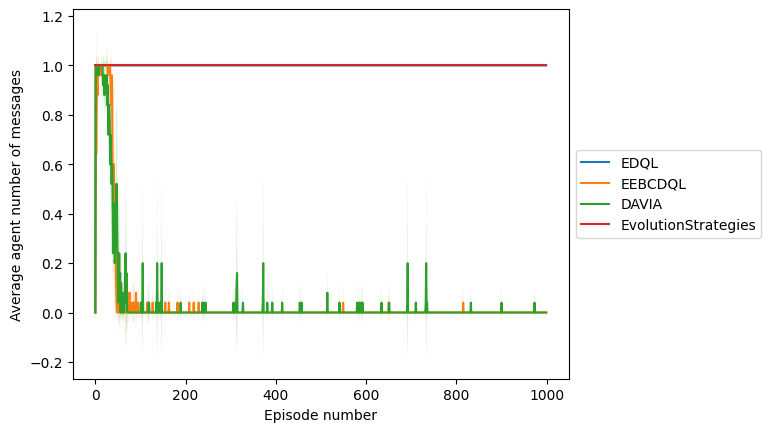

Amount of communication

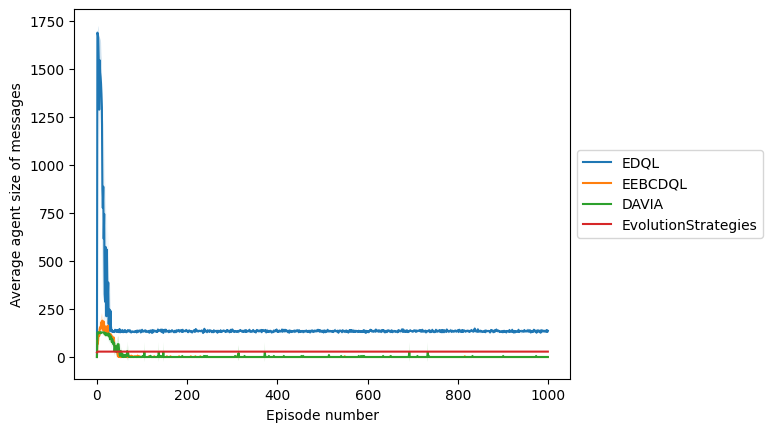

In [6]:
#code to make graphs of all agents on simple grid
#on the left a graph of the cumulative reward of each algorithm averaged across their agents
#on the right a graph of the number of messages sent by each algorithm averaged across their agents
from DataAnalysis.Analysis import getAlgorithmEpisodeAverageReward, getAgentEpisodeAverageNumMessages,getAgentEpisodeAverageSizeMessages, plotAlgorithmAverageTrialReward, plotAlgorithmAverageTrialMessages
import pickle
from IPython.display import display, Markdown
from collections import defaultdict
import numpy as np
for environment, fileNames in zip(environments, envFiles):
    display(Markdown(f"## {environment}"))
    for numAgents in numbersOfAgents:
        algorithmData = defaultdict(lambda: {"reward":[], "messages":[], "message_size": []})
        for fileName in fileNames:
            with open(f"{filepath}{fileName}.pkl", 'rb') as f:
                data = pickle.load(f)
                for algorithm in algorithms:
                    algorithmData[algorithm]["reward"].append(getAlgorithmEpisodeAverageReward(data, algorithm, numAgents, environment))
                    algorithmData[algorithm]["messages"].append(getAgentEpisodeAverageNumMessages(data, algorithm, numAgents, environment))
                    algorithmData[algorithm]["message_size"].append(getAgentEpisodeAverageSizeMessages(data, algorithm, numAgents, environment))

        rewards = {algorithm: (np.mean(algorithmData[algorithm]["reward"], axis=0), np.std(algorithmData[algorithm]["reward"], axis=0)) for algorithm in algorithms}
        messages = {algorithm: (np.mean(algorithmData[algorithm]["messages"], axis=0), np.std(algorithmData[algorithm]["messages"], axis=0)) for algorithm in algorithms}
        message_size = {algorithm: (np.mean(algorithmData[algorithm]["message_size"], axis=0), np.std(algorithmData[algorithm]["message_size"], axis=0)) for algorithm in algorithms}
        display(Markdown(f"### Number of Agents: {numAgents}"))
        display(Markdown(f"Quality of learning"))
        fig = plt.figure()
        for algorithm, (y, error) in rewards.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm)  
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent reward')
        # plt.ylim([-1000, 10])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        display(Markdown(f"Amount of communication"))
        fig = plt.figure()
        for algorithm, (y, error) in messages.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm) 
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent number of messages')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        display(Markdown(f"Amount of communication"))
        fig = plt.figure()
        for algorithm, (y, error) in message_size.items():
            x = [i for i in range(len(y))]
            plt.plot(x,y, label=algorithm) 
            plt.fill_between(x, y-error, y+error, alpha=0.2)  
        plt.xlabel('Episode number')
        plt.ylabel('Average agent size of messages')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()